### XGBoosting Easy version

In [1]:
import numpy as np                   # array, vector, matrix calculations
import pandas as pd                  # DataFrame handling
#import shap                          # for consistent, signed variable importance measurements
import xgboost as xgb                # gradient boosting machines (GBMs)
import math

import matplotlib.pyplot as plt      # plotting
pd.options.display.max_columns = 999 # enable display of all columns in notebook

# enables display of plots in notebook
%matplotlib inline

np.random.seed(42)                # set random seed for reproducibility

In [2]:
# import XLS file
path = ".\\credit_cards_dataset.csv"
#data = pd.read_excel(path, skiprows=1) # skip the first row of the spreadsheet

#path = 'C:\\Users\\User\\Desktop\\data\\original_data.csv'
#data = pd.read_csv(path, skiprows=1) # skip the first row of the spreadsheet
data = pd.read_csv(path) # skip the first row of the spreadsheet

# remove spaces from target column name 
data = data.rename(columns={'default payment next month': 'DEFAULT_NEXT_MONTH'})

In [3]:
# assign target and inputs for GBM
#y = 'DEFAULT_NEXT_MONTH'
y='default.payment.next.month'
X = [name for name in data.columns if name not in [y, 'ID', 'Y_Value']]
print('y =', y)
print('X =', X)

y = default.payment.next.month
X = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [4]:
split_ratio=0.7

# execute split
split = np.random.rand(len(data)) < split_ratio
train=data[split]
test=data[~split]

print('Train data rows = %d. columns = %d' % (train.shape[0], train.shape[1]))
print('Test data rows = %d. columns = %d' % (test.shape[0], test.shape[1]))

Train data rows = 21087. columns = 25
Test data rows = 8913. columns = 25


In [16]:
# XGBoost uses SVMLight data structure, not Numpy arrays or Pandas DataFrames 

mod = xgb.XGBRegressor(
    gamma=1,                 
    learning_rate=0.01,
    max_depth=3,
    n_estimators=10000,                                                                    
    subsample=0.8,
    random_state=42,
    verbosity=1
)

In [17]:
mod.fit(train[X], train[y])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [18]:
predictions = mod.predict(test[X])

In [19]:
from sklearn.metrics import mean_squared_error

In [7]:
test[y]

1        1
2        0
7        0
9        0
11       0
        ..
29982    1
29983    0
29991    1
29995    0
29996    0
Name: default.payment.next.month, Length: 8913, dtype: int64

In [20]:
rmse = math.sqrt(mean_squared_error(test[y], predictions))
print(rmse)
#print("score: {0:,.0f}".format(rmse))

0.37116477513896023


In [21]:
predictions=np.rint(predictions)

In [11]:
predictions

array([0., 0., 0., ..., 1., 0., 0.], dtype=float32)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

accuracy = accuracy_score(test[y], predictions)
cm = confusion_matrix(test[y], predictions)
precision = precision_score(test[y], predictions)
recall = recall_score(test[y], predictions)

In [23]:
print(accuracy)
print(cm)
print(precision)
print(recall)

0.8181308201503422
[[6567  338]
 [1283  725]]
0.6820319849482597
0.3610557768924303


In [24]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6567  338]
 [1283  725]]


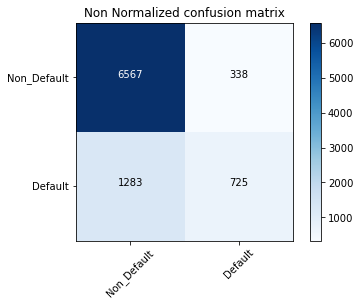

In [25]:
plt.figure()
plot_confusion_matrix(cm, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')